# Intro
In this notebook we will use the CSV files created from the "04_prep_imported_data" notebook to train, validate and test our model.

Many other models that have been published seem to be using a Convolutional Neural Network build on Keras layers. Instead, we will be using Tensorflow's DNNClassifier Estimator, which results in code that is much shorter and easier to read, and leaves all the complexities of building the Neural Network to Tensorflow.

# Initialize

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Sample TensorFlow usage
logger.info(f"TensorFlow version: {tf.__version__}")


INFO:__main__:TensorFlow version: 2.17.0


# Load Data
Load the CSV files with training, validation, and testing data. These files are generated by the "04_prep_imported_data" notebook.

In [3]:
# Training dataset.
df = pd.read_csv("train.csv", header=None)
x_train = df.values[:, :-1]
y_train = df.values[:, -1].astype(int)

# Validation dataset.
df = pd.read_csv("validate.csv", header=None)
x_validate = df.values[:, :-1]
y_validate = df.values[:, -1].astype(int)

# Test dataset.
df = pd.read_csv("test.csv", header=None)
x_test = df.values[:, :-1]
y_test = df.values[:, -1].astype(int)

In [4]:
del df

# Visualize Data
Display one Normal, and one Abnormal heartbeat.

In [5]:
C0 = np.argwhere(y_train == 0).flatten()
C1 = np.argwhere(y_train == 1).flatten()

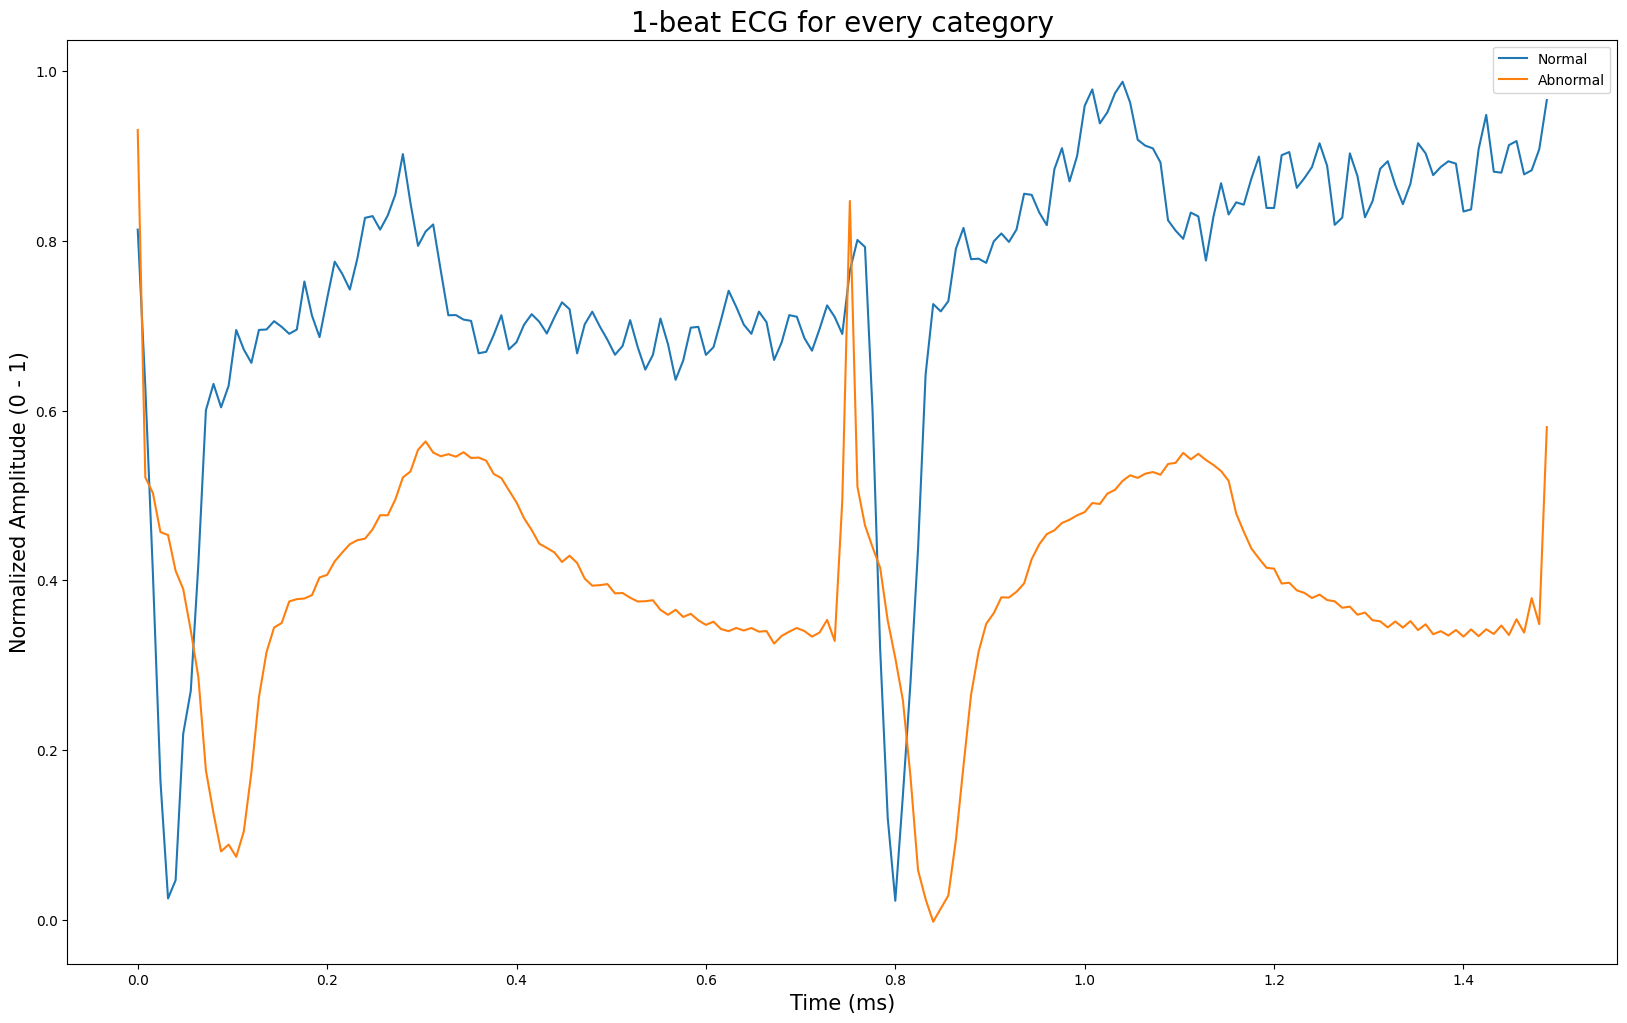

In [6]:
x = np.arange(0, 187)*8/1000.0

plt.figure(figsize=(20,12))
plt.plot(x, x_train[C0, :][0], label="Normal") # Display first normal beat.
plt.plot(x, x_train[C1, :][0], label="Abnormal") # Display first abnormal beat.
plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Normalized Amplitude (0 - 1)", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

# Train Model
Use the Tensorflow Estimator API to build out the model.

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load data from the CSV file
# Replace 'path_to_csv_file.csv' with the actual path to your processed CSV file
data = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Projects in CV\ECG_ML-master CV\ECG_ML-master\Train.csv').values

# Split features (beats) and labels
x_data = data[:, :-1]  # First 187 columns are features
y_data = data[:, -1].astype(np.int32)  # Last column is the label (0 for Normal, 1 for Abnormal)

# Split data into training and testing datasets
train_size = int(0.8 * len(x_data))
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

# Build the Keras model
model = Sequential([
    Dense(256, activation='relu', input_shape=(187,)),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')  # Output layer for 2 classes
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',  # Use sparse labels for integer classes
    metrics=['accuracy']
)

# Train the model
print("Starting training...")
model.fit(x_train, y_train, batch_size=50, epochs=10, shuffle=True)
print("Training complete.")

# Evaluate the model
print("Evaluating the model on test data...")
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting training...
Epoch 1/10
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 57s 21ms/step - accuracy: 0.7355 - loss: 0.5525
Epoch 2/10
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.8075 - loss: 0.4325
Epoch 3/10
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.8356 - loss: 0.3864
Epoch 4/10
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 45s 21ms/step - accuracy: 0.8498 - loss: 0.3621
Epoch 5/10
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.8562 - loss: 0.3507
Epoch 6/10
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.8635 - loss: 0.3364
Epoch 7/10
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.8669 - loss: 0.3289
Epoch 8/10
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 0.8708 - loss: 0.3188
Epoch 9/10
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 0.8740 - loss: 0.3154
Epoch 10/10
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 0.8771 - loss: 0.3083
Training complete.
Evaluating the model on test data...
806/806 ━━━━━━━━━━━━━━

# Validate Model
Evaluate how well the model is working.

In [ ]:
# Define the validation dataset
def input_fn_validate(x_validate, y_validate):
    # Create a dataset from the validation data
    dataset = tf.data.Dataset.from_tensor_slices((x_validate, y_validate))
    # No shuffling, single epoch
    return dataset.batch(50)

train_size = int(0.7 * len(x_data))
val_size = int(0.2 * len(x_data))

x_train = x_data[:train_size]
y_train = y_data[:train_size]

x_val = x_data[train_size:train_size + val_size]
y_val = y_data[train_size:train_size + val_size]

# Evaluate the model on validation data using Dataset API
validate_dataset = input_fn_validate(x_val, y_val)
print("Evaluating the model on validation data (Dataset API)...")
loss, accuracy = model.evaluate(validate_dataset)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")


Evaluating the model on validation data (Dataset API)...
 20/516 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8691 - loss: 0.3231

516/516 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8787 - loss: 0.3084
Validation Loss: 0.3070, Validation Accuracy: 0.8792
Evaluating the model on test data...
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8753 - loss: 0.3191
Test Loss: 0.3143, Test Accuracy: 0.8758


# Test Model
Testing the model by doing predictions.

In [27]:
# Evaluate the model on test data
test_dataset = input_fn_validate(x_test, y_test)
print("Evaluating the model on test data...")
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Evaluating the model on test data...
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8753 - loss: 0.3191
Test Loss: 0.3143, Test Accuracy: 0.8758


# Evaluation
Evaluation Metrics are calculated to analyse the performance of the network

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test dataset
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Normal', 'Abnormal']))

# Accuracy
accuracy = np.mean(y_pred_classes == y_test)
print(f"\nAccuracy: {accuracy:.4f}")

# Custom Metrics Calculation
# Precision, Recall, F1-Score manually
TP = conf_matrix[1, 1]  # True Positives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives
TN = conf_matrix[0, 0]  # True Negatives

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")


403/403 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step
Confusion Matrix:
[[8768  224]
 [1378 2526]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      0.98      0.92      8992
    Abnormal       0.92      0.65      0.76      3904

    accuracy                           0.88     12896
   macro avg       0.89      0.81      0.84     12896
weighted avg       0.88      0.88      0.87     12896


Accuracy: 0.8758
Precision: 0.9185
Recall: 0.6470
F1-Score: 0.7592
